In [46]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

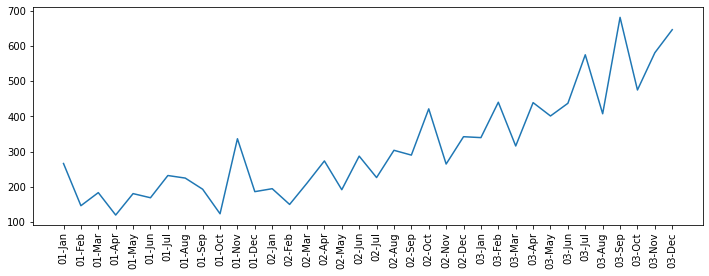

In [7]:
df = pd.read_csv('data/shampoo_dataset.csv')
plt.figure(figsize=(12,4))
plt.plot(df.Month, df.Sales)
plt.xticks(rotation=90)
plt.show()

In [8]:
result = adfuller(df.Sales.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 3.060142
p-value: 1.000000


Como p-value é alto, é necessário fazer transformação dos dados. Utilizaremos diferenciação da série.

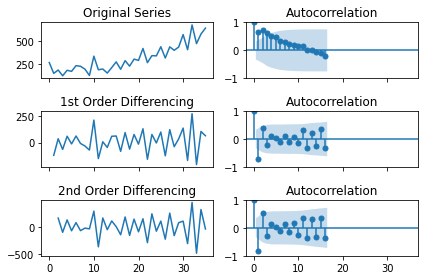

In [10]:
fig, axes = plt.subplots(3, 2, sharex=True)

axes[0, 0].plot(df.Sales); 
axes[0, 0].set_title('Original Series')
plot_acf(df.Sales, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.Sales.diff()); 
axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.Sales.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.Sales.diff().diff()); 
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.Sales.diff().diff().dropna(), ax=axes[2, 1])

plt.tight_layout()

plt.show()

Escolhermos a diferenciação de ordem 1 <b>(d=1)</b>.

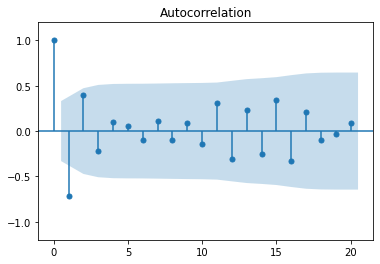

In [17]:
# Autocorrelação de DIFF(df.Sales)
sm.graphics.tsa.plot_acf(df.Sales.diff().dropna().values.squeeze(), lags=20)
plt.ylim(-1.2,1.2)
plt.show()

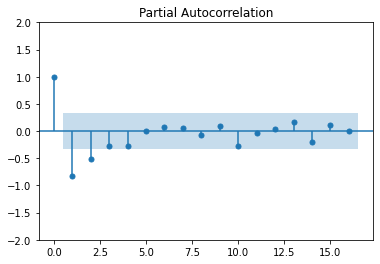

In [21]:
# Autocorrelação parcial de DIFF(df.Sales)
sm.graphics.tsa.plot_pacf(
    df.Sales.diff().diff().dropna().values.squeeze(), 
    method='ywm',
    lags=16)
plt.ylim(-2,2)
plt.show()

Para AR escolheremos p=1 e para MA escolheremos q=2.

In [26]:
# ARIMA order (p,d,q)
model = ARIMA(df.Sales, order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -196.631
Date:                Thu, 20 Jan 2022   AIC                            401.263
Time:                        10:48:08   BIC                            407.484
Sample:                             0   HQIC                           403.411
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0894      0.346      0.258      0.796      -0.589       0.768
ma.L1         -1.3186      2.951     -0.447      0.655      -7.103       4.466
ma.L2          0.9944      4.393      0.226      0.8

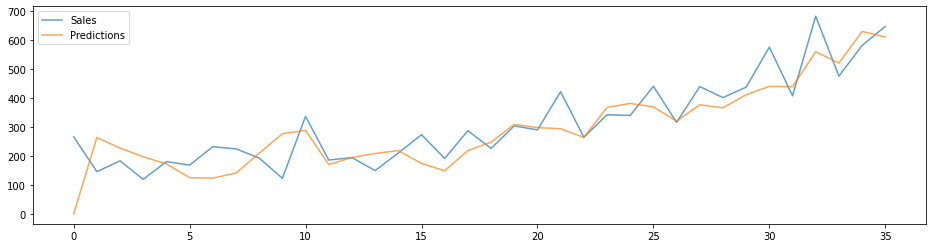

In [29]:
pred = model_fit.predict()
plt.figure(figsize=(16,4))
plt.plot(df.index, df.Sales, alpha=0.7, label="Sales")
plt.plot(pred.index, pred, alpha=0.7, label="Predictions")
plt.legend()
plt.show()

## Com treino e teste

In [33]:
train = df[:30]
test = df[30:]

In [48]:
model = ARIMA(train.Sales, order=(1, 1, 2))  
fitted = model.fit()

# Forecast
pred = fitted.forecast(6, alpha=0.05) # 6 valores

mape = np.mean(np.abs(pred - test.Sales.values)/np.abs(test.Sales.values))  # MAPE

print(mape)

0.26332222818252987


Isso significa que o modelo tem 73,66% de acurácia.

Referência:
    
- https://medium.com/analytics-vidhya/python-code-on-arima-forecasting-d6e2fd90697c